In [6]:
# Setup
import osmnx as ox
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.cm as cm
import matplotlib as matplotlib

%matplotlib inline
ox.config(log_console=True, use_cache=True)

c:\Users\jack-\anaconda3\envs\ox\Lib\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [7]:
# Import street names

streets = {}

with open("output.txt", encoding="utf8") as f:
    lines = f.readlines()
    most_freq = 0
    for line in lines:
        s = line.strip().lower().split(",")
        streets[s[0]] = int(s[1])
        if int(s[1]) > most_freq:
            most_freq = int(s[1])

In [8]:
# Colour coding

pink = "#FF1493"
black = "#0000"	

def colour_map(value, cmap_name='YlOrRd', vmin=1, vmax=1):
    # norm = plt.Normalize(vmin, vmax)
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = matplotlib.colors.rgb2hex(rgb)
    return color

def colourcode(road_name):
    if road_name.lower() in streets:
        return colour_map(streets[road_name], vmin=1, vmax=100)
    return "#FFFFFF"


def edge_size(road_name):
    if road_name.lower() in streets:
        return 0.5
    return 0.05

In [9]:
# Generate graph
place='Paris, France'
G = ox.graph_from_place(place, network_type='all', which_result=1)

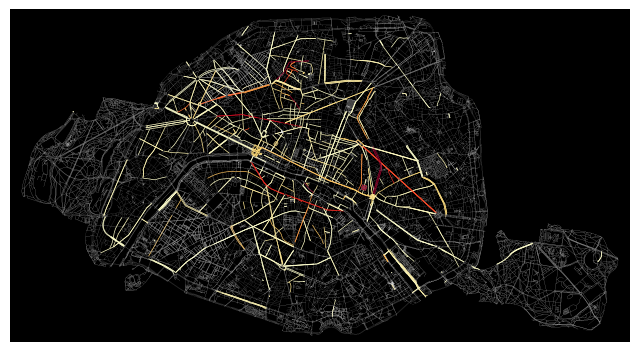

In [10]:
# For the colouring, we take the attributes from each edge found extract the road name, and use the function above to create the colour array
edge_attributes = ox.graph_to_gdfs(G, nodes=False)
ec = [colourcode(str(row['name']).lower()) for index, row in edge_attributes.iterrows()]
es = [edge_size(str(row['name']).lower()) for index, row in edge_attributes.iterrows()]
# We can finally draw the plot
fig, ax = ox.plot_graph(G, bgcolor='black', node_size=0, node_color='white', node_edgecolor='white', node_zorder=2,
                        edge_color=ec, edge_linewidth=es, edge_alpha=1, dpi=1080, save=True, filepath="maigret_final2.png")